# MIS 670 Final Project

**Jace Bothner**
    

Watch the video presentation here: <br> https://youtu.be/EF8a5sYS6Co

If you're not able to view the interactive visuals try viewing the project on my github page:<br>
https://github.com/jbothner21/MIS_670_Final_Project

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Project-Introduction-and-Problem-Definition" data-toc-modified-id="1.-Project-Introduction-and-Problem-Definition-1">1. Project Introduction and Problem Definition</a></span><ul class="toc-item"><li><span><a href="#a.-Purpose" data-toc-modified-id="a.-Purpose-1.1">a. Purpose</a></span></li><li><span><a href="#b.-Hypotheses" data-toc-modified-id="b.-Hypotheses-1.2">b. Hypotheses</a></span></li></ul></li><li><span><a href="#2.-Data-Identification-and-Collection" data-toc-modified-id="2.-Data-Identification-and-Collection-2">2. Data Identification and Collection</a></span></li><li><span><a href="#3.-Data-Cleaning-and-Text-Preprocessing" data-toc-modified-id="3.-Data-Cleaning-and-Text-Preprocessing-3">3. Data Cleaning and Text Preprocessing</a></span></li><li><span><a href="#4.-Descriptive-Analytics" data-toc-modified-id="4.-Descriptive-Analytics-4">4. Descriptive Analytics</a></span><ul class="toc-item"><li><span><a href="#a.-Word-frequency-analysis" data-toc-modified-id="a.-Word-frequency-analysis-4.1">a. Word frequency analysis</a></span></li><li><span><a href="#b.-Word-cloud" data-toc-modified-id="b.-Word-cloud-4.2">b. Word cloud</a></span></li><li><span><a href="#c.-Descriptive-statistics" data-toc-modified-id="c.-Descriptive-statistics-4.3">c. Descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#1.-Number-of-words-per-song" data-toc-modified-id="1.-Number-of-words-per-song-4.3.1">1. Number of words per song</a></span></li><li><span><a href="#2.-Song-repetitiveness-using-Lempel-Ziv" data-toc-modified-id="2.-Song-repetitiveness-using-Lempel-Ziv-4.3.2">2. Song repetitiveness using Lempel-Ziv</a></span></li></ul></li></ul></li><li><span><a href="#5.-Content-Analytics" data-toc-modified-id="5.-Content-Analytics-5">5. Content Analytics</a></span><ul class="toc-item"><li><span><a href="#a.-Sentiment-analysis" data-toc-modified-id="a.-Sentiment-analysis-5.1">a. Sentiment analysis</a></span></li><li><span><a href="#b.-Text-classification" data-toc-modified-id="b.-Text-classification-5.2">b. Text classification</a></span></li><li><span><a href="#c.-Topic-modeling" data-toc-modified-id="c.-Topic-modeling-5.3">c. Topic modeling</a></span></li></ul></li><li><span><a href="#6.-Network-Analytics" data-toc-modified-id="6.-Network-Analytics-6">6. Network Analytics</a></span></li><li><span><a href="#7.-Storytelling-and-Conclusion" data-toc-modified-id="7.-Storytelling-and-Conclusion-7">7. Storytelling and Conclusion</a></span><ul class="toc-item"><li><span><a href="#a.-Key-takeaways" data-toc-modified-id="a.-Key-takeaways-7.1">a. Key takeaways</a></span></li><li><span><a href="#b.-Implications" data-toc-modified-id="b.-Implications-7.2">b. Implications</a></span></li></ul></li></ul></div>

## 1. Project Introduction and Problem Definition

### a. Purpose
The purpose of this project is to explore how lyrical content in popular music has changed over time. <br><br>
Music, while not only an art form and medium of expression, is also a multi-billion dollar a year industry. Revenue aside, one of music's main purposes is serving as cultural expression. Therefore, the most popular songs within a given time are representative of that time. While many can identify musical styles of certain generations, it's worth asking how the lyrical content of these periods differ. In this project, we'll explore how lyrical content has evolved and how it impacts the future of lyricism.

### b. Hypotheses
While exploring lyrical content, we'll test several common claims made about the evolution of pop music. These claims are:
1. Song lyrics have become more repetitive over time
2. Lyrics in songs have become more verbose, in other words more text heavy
3. Song lyrics have become sadder, angrier, or generally more negative over time

## 2. Data Identification and Collection 

In [2]:
## Import packages
import csv
import pandas as pd
import re
import numpy as np
import requests
from lxml import html
import time
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import itertools
from itertools import combinations
from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from lempel_ziv_complexity import lempel_ziv_complexity
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
import pyLDAvis.gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
from IPython.display import IFrame
from IPython.core.display import display
import warnings
warnings.filterwarnings(action='ignore')

To gather song lyrics that are most representative of their time period we'll use a dataset from data scientist Steve Hawtin. This dataset features the top 5000 songs of all time. In order to compile and rank this list, Hawtin compiled chart positions from 230 popular music charts like Billboard, RIAA, and Rolling Stone. Then he assigned each song an overall score by incorporating appearances on each chart weighted by the importance of the chart. For more information on this process and methodology, visit the link below. <br>
https://tsort.info/music/faq_site_generation.htm

In [3]:
## Load top 5000 songs of all time dataset
df = pd.read_csv('data/top5000songs.csv')
len(df)

5000

For this project, we'll focus on certain distinct periods of music. The easiest way to group these periods is by decades. We'll start with the 1950s and continue until the 2010s, the most recent complete decade. Therefore, we'll filter out any songs before or after these time periods.

In [4]:
## Filter out songs before the 1950s
df = df[(df.year < 2020) & (df.year > 1949)]
df = df.reset_index(drop=True)
len(df)

4645

In [5]:
## View dataframe
df.head()

artist                               name  year
0              Bryan Adams  (Everything I Do) I Do it For You  1991
1          Whitney Houston             I Will Always Love You  1992
2  Bill Haley & his Comets              Rock Around the Clock  1955
3              Celine Dion                My Heart Will Go On  1998
4              The Beatles                           Hey Jude  1968

The top 5000 songs dataset contains the artist's name, the song name, and the year. In order to get the lyrics for each song, we'll have to create links to crawl and scrape information. In the cell below, we're creating the song name portion of the URL by hyphenating each word in the song title.

In [6]:
## Prepare song name column for scraping
df['link_name'] = df['name'].str.replace('&','and', regex=True)
df['link_name'] = df['link_name'].replace("'","", regex=True)
df['link_name'] = df['link_name'].str.replace("[^a-zA-Z0-9]", "-")
df['link_name'] = df['link_name'].str.replace("\\--", "-", regex=True)
df['link_name'] = df['link_name'].str.lstrip('-')
df['link_name'] = df['link_name'].str.rstrip('-')
df['link_name'] = df['link_name'].str.lower()
df.head()

artist                               name  year  \
0              Bryan Adams  (Everything I Do) I Do it For You  1991   
1          Whitney Houston             I Will Always Love You  1992   
2  Bill Haley & his Comets              Rock Around the Clock  1955   
3              Celine Dion                My Heart Will Go On  1998   
4              The Beatles                           Hey Jude  1968   

                         link_name  
0  everything-i-do-i-do-it-for-you  
1           i-will-always-love-you  
2            rock-around-the-clock  
3              my-heart-will-go-on  
4                         hey-jude

Here we'll use this same process for the artist portion of the URL.

In [7]:
## Prepare artist name column for scraping
df['artist'] = df['artist'].str.split('&').str[0]
df['link_artist'] = df['artist']
df['link_artist'] = df['link_artist'].replace("'","", regex=True)
df['link_artist'] = df['link_artist'].str.lstrip("The ")
df['link_artist'] = df['link_artist'].str.replace("[^a-zA-Z0-9]", "-")
df['link_artist'] = df['link_artist'].str.replace("\\--", "-", regex=True)
df['link_artist'] = df['link_artist'].str.lstrip('-')
df['link_artist'] = df['link_artist'].str.rstrip('-')
df['link_artist'] = df['link_artist'].str.lower()
df.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Bill Haley               Rock Around the Clock  1955   
3      Celine Dion                My Heart Will Go On  1998   
4      The Beatles                           Hey Jude  1968   

                         link_name      link_artist  
0  everything-i-do-i-do-it-for-you      bryan-adams  
1           i-will-always-love-you  whitney-houston  
2            rock-around-the-clock       bill-haley  
3              my-heart-will-go-on      celine-dion  
4                         hey-jude          beatles

Now we can combine these elements to create links using the MetroLyrics URL. Each URL on the metro lyrics site has its domain name, the name of the song, a lyrics tag, the name of the artist, and an html tag.

In [8]:
## Create links using metrolyrics url
df['link'] = 'https://www.metrolyrics.com/' + df['link_name'].astype(str) + '-lyrics-' + df['link_artist'].astype(str) + '.html'
df.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Bill Haley               Rock Around the Clock  1955   
3      Celine Dion                My Heart Will Go On  1998   
4      The Beatles                           Hey Jude  1968   

                         link_name      link_artist  \
0  everything-i-do-i-do-it-for-you      bryan-adams   
1           i-will-always-love-you  whitney-houston   
2            rock-around-the-clock       bill-haley   
3              my-heart-will-go-on      celine-dion   
4                         hey-jude          beatles   

                                                link  
0  https://www.metrolyrics.com/everything-i-do-i-...  
1  https://www.metrolyrics.com/i-will-always-love...  
2  https://www.metrolyrics.com/rock-around-the-cl...  
3  https://www.metrolyrics.com/my-heart-will-go-o...  
4  https://www.metrolyrics.com/hey-jude-lyrics-be...

In [9]:
## Link column to list
link = df['link'].tolist()

for i in link[:5]:
    print(i)

https://www.metrolyrics.com/everything-i-do-i-do-it-for-you-lyrics-bryan-adams.html
https://www.metrolyrics.com/i-will-always-love-you-lyrics-whitney-houston.html
https://www.metrolyrics.com/rock-around-the-clock-lyrics-bill-haley.html
https://www.metrolyrics.com/my-heart-will-go-on-lyrics-celine-dion.html
https://www.metrolyrics.com/hey-jude-lyrics-beatles.html


Now using the links we've creating, we'll crawl through each link to scrape the song's lyrics.

In [10]:
## Crawl through metrolyrics links and scrape lyrics
alldata = []
seconds = 2
            
for item in link: 
    data = html.fromstring(requests.get(item, time.sleep(seconds)).text)
    for i in data.xpath("//html/body"):
        lyrics = i.xpath('//div[@id="lyrics-body-text"]/p[contains(@class,"verse")]/text()')     
        alldata.append([lyrics])

In [11]:
## Convert lyrics to dataframe
lyrics = pd.DataFrame(alldata, columns =['lyrics'])
lyrics.head()

lyrics
0  [Look into my eyes - you will see, \nWhat you ...
1  [If I should stay, \nI would only be in your w...
2  [One, two, three o'clock, four o'clock rock, \...
3  [Every night in my dreams, \nI see you, I feel...
4  [Hey Jude, don't make it bad, \nTake a sad son...

In [12]:
## Merge lyrics with original dataframe
df = df.join(lyrics, how='inner')
df = df[['artist', 'name', 'year', 'lyrics']]
df.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Bill Haley               Rock Around the Clock  1955   
3      Celine Dion                My Heart Will Go On  1998   
4      The Beatles                           Hey Jude  1968   

                                              lyrics  
0  [Look into my eyes - you will see, \nWhat you ...  
1  [If I should stay, \nI would only be in your w...  
2  [One, two, three o'clock, four o'clock rock, \...  
3  [Every night in my dreams, \nI see you, I feel...  
4  [Hey Jude, don't make it bad, \nTake a sad son...

In [13]:
## Save csv file
df.to_csv("data/scraped_lyrics.csv", index=False)

## 3. Data Cleaning and Text Preprocessing

Now that we have our lyrical information, it's important to clean the text before performing any analysis. This process involves removing any markup included in the text after scraping, any non-numeric or English characters, and other similar processes that would affect our analysis.

In [14]:
## Load scraped data
df = pd.read_csv('data/scraped_lyrics.csv')
df.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Bill Haley               Rock Around the Clock  1955   
3      Celine Dion                My Heart Will Go On  1998   
4      The Beatles                           Hey Jude  1968   

                                              lyrics  
0  ['Look into my eyes - you will see', '\nWhat y...  
1  ['If I should stay', '\nI would only be in you...  
2  ["One, two, three o'clock, four o'clock rock",...  
3  ['Every night in my dreams', '\nI see you, I f...  
4  ["Hey Jude, don't make it bad", '\nTake a sad ...

In [15]:
## Remove newline
df['lyrics'] = df['lyrics'].replace(r'\\n','', regex=True)
## Remove apostrophe to include contractions
df['lyrics'] = df['lyrics'].replace("'","", regex=True)
## Remove useless numbers and alphanumerical words
df['lyrics'] = df['lyrics'].str.replace('[^a-zA-Z-0-9.]+', ' ')
## Convert to lowercase
df['lyrics'] = df['lyrics'].str.lower()
## Remove instrumental
df['lyrics'] = df['lyrics'].str.replace('instrumental', '')
## Remove unauthorized message
df['lyrics'] = df['lyrics'].str.replace('unfortunately we are not authorized to show these lyrics', '')
## Remove leading and trailing whitespace
df['lyrics'] = df['lyrics'].str.strip()
## Convert empty whitespace to NaN
df['lyrics'] = df['lyrics'].replace(r'^\s*$', np.nan, regex=True)
df.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Bill Haley               Rock Around the Clock  1955   
3      Celine Dion                My Heart Will Go On  1998   
4      The Beatles                           Hey Jude  1968   

                                              lyrics  
0  look into my eyes - you will see what you mean...  
1  if i should stay i would only be in your way s...  
2  one two three oclock four oclock rock five six...  
3  every night in my dreams i see you i feel you ...  
4  hey jude dont make it bad take a sad song and ...

In [16]:
## View first song's cleaned lyrics
for i in df['lyrics'][:1]:
    print(i)

look into my eyes - you will see what you mean to me. search your heart search your soul and when you find me there youll search no more. dont tell me its not worth tryin for. you cant tell me its not worth dyin for. you know its true everything i do i do it for you. look into your heart - you will find theres nothin there to hide. take me as i am take my life. i would give it all i would sacrifice. dont tell me its not worth fightin for i cant help it theres nothin i want more you know its true everything i do i do it for you oh yeah. theres no love like your love and no other could give more love. theres nowhere unless youre there all the time all the way yeah. look into your heart baby... oh you cant tell me its not worth tryin for. i cant help it theres nothin i want more. yeah i would fight for you id lie for you walk the wire for you yeah id die for you. you know its true everything i do oh i do it for you. everything i do darling. you will see its true. you will see its true. ye

In [17]:
## Check for null values
df.isnull().sum()

artist       0
name         0
year         0
lyrics    1525
dtype: int64

After cleaning the text we can check for any null values in the dataset. These null values are a result of scraping the lyrics from MetroLyrics' website. For example, some songs may be instrumental and not feature lyrics. Other songs may not have lyrical information because MetroLyrics is not authorized to display the lyrics. Another common occurrence is a discrepancy between an artist or a song name in the dataset and how it's featured on MetroLyrics' site. After dropping these null values, there are still 3120 with lyrics which will provide a reasonable sample size to analyze and draw conclusions from.

In [18]:
## Drop rows with null values
df.dropna(subset=['lyrics'], how='all', inplace = True)
df.reset_index(inplace=True, drop=True)
len(df)

3120

Here we'll define a function to process text that we can apply as needed. This function will tokenize the text, a process of breaking the text into separate words. It will also remove stopwords, the most common words in a language which won't be meaningful in our analysis. It's also worth noting that additional stop words have been set to remove non-lexical vocables, a music term for a nonsensical syllable used to sing a melody. Similarly, the processing function will remove short words under three characters since these words aren't meaningful in our analysis. The function also converts the tokens to lowercase since python is case sensitive. Lastly, the function will 'stem' words, a process of breaking a word down to its root and removing the suffix.

In [19]:
## Define text processing function
def text_processing(x):
    ## Convert list to string
    tokens = str(x)
    ## Convert to lowercase
    tokens = tokens.lower()
    ## Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    ## Tokenization or word split
    tokens = word_tokenize(tokens)
    ## Get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = [ wordnet_lemmatizer.lemmatize(word) for word in tokens ]
    ## Additional stopwords
    more_stopwords = set(('ooh', 'oooh', 'aaah', 'chh', 'doo'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    ## Remove stopwords
    tokens = [ i for i in tokens if i not in stopwords.words('english')]
    ## Filter non-alphanumeric characters from tokens
    tokens = [ word for word in tokens if word.isalpha() ]
    ## Remove short words
    tokens = [ i for i in tokens if len(i) >= 3 ]
    return tokens

In [20]:
## Convert lyrics to list and process text
lyrics_processed = df['lyrics'].to_list()
lyrics_processed = text_processing(lyrics_processed)
lyrics_processed[:10]

['look',
 'eye',
 'see',
 'mean',
 'search',
 'heart',
 'search',
 'soul',
 'find',
 'youll']

Now we can separate each song into its respective decade based on the year of its release. It's worth noting that songs aren't equally represented by decade in the dataset. Therefore, decades with a larger sample size might have a higher amount of credibility in our analysis. Although, the reasons for stark differences in sample size by decade are likely intuitive. Music in the 1950s likely wasn't marketed as aggressively as in subsequent decades and therefore is less represented on the top songs of all time. On the other end of the spectrum, songs in the 2010s have had less time to gain popularity and move up on the list of all time songs. After separating songs into decades we can apply the text processing function to process the lyrics for each decade.

In [21]:
## Separate into decades
df50 = df[(df.year < 1960) & (df.year > 1949)].reset_index(drop=True)
df60 = df[(df.year < 1970) & (df.year > 1959)].reset_index(drop=True)
df70 = df[(df.year < 1980) & (df.year > 1969)].reset_index(drop=True)
df80 = df[(df.year < 1990) & (df.year > 1979)].reset_index(drop=True)
df90 = df[(df.year < 2000) & (df.year > 1989)].reset_index(drop=True)
df00 = df[(df.year < 2010) & (df.year > 1999)].reset_index(drop=True)
df10 = df[(df.year < 2020) & (df.year > 2009)].reset_index(drop=True)
print('50s:', len(df50), '\n60s:', len(df60), '\n70s:', len(df70), 
      '\n80s:', len(df80), '\n90s:', len(df90), '\n00s:', len(df00), '\n10s:', len(df10))

50s: 152 
60s: 335 
70s: 514 
80s: 613 
90s: 699 
00s: 665 
10s: 142


In [22]:
## View 90s dataframe
df90.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Celine Dion                My Heart Will Go On  1998   
3  Sinead O'Connor               Nothing Compares 2 U  1990   
4       Elton John             Candle in the Wind '97  1997   

                                              lyrics  
0  look into my eyes - you will see what you mean...  
1  if i should stay i would only be in your way s...  
2  every night in my dreams i see you i feel you ...  
3  its been seven hours and fifteen days since u ...  
4  goodbye englands rose may you ever grow in our...

In [23]:
## Process lyrics for each decade
lyrics_processed50 = df50['lyrics'].to_list()
lyrics_processed50 = text_processing(lyrics_processed50)
lyrics_processed60 = df60['lyrics'].to_list()
lyrics_processed60 = text_processing(lyrics_processed60)
lyrics_processed70 = df70['lyrics'].to_list()
lyrics_processed70 = text_processing(lyrics_processed70)
lyrics_processed80 = df80['lyrics'].to_list()
lyrics_processed80 = text_processing(lyrics_processed80)
lyrics_processed90 = df90['lyrics'].to_list()
lyrics_processed90 = text_processing(lyrics_processed90)
lyrics_processed00 = df00['lyrics'].to_list()
lyrics_processed00 = text_processing(lyrics_processed00)
lyrics_processed10 = df10['lyrics'].to_list()
lyrics_processed10 = text_processing(lyrics_processed10)

## 4. Descriptive Analytics

### a. Word frequency analysis 

Word frequency analysis will show which words are most prevalent in the song lyrics. This type of analysis not only will show which words are used the most, but can provide an idea of what songs are about based on most frequent words. For example, the word frequency for the entire dataset (all decades) is shown below. The most popular word used in all songs is 'love' meaning that 'love songs' are likely most prevalent in pop songs.

In [24]:
## Most frequent words for all lyrics
fdist = nltk.FreqDist(lyrics_processed)
fdist = fdist.most_common(20)
df_fdist = pd.DataFrame(fdist, columns=['words', 'count'])
fig = px.bar(df_fdist, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='All Lyrics Word Count')

Now we'll separate word frequency by decade to see how word frequency has changed over time. The word frequency for songs from the 1950s is shown below. It's already apparent based on the frequency of the word 'love' and similar words such as 'heart' and 'baby' how prevalent 'love songs' were in the 1950s, especially compared to the frequency of all lyrics.

In [25]:
## Most frequent words for 50s songs
fdist50 = nltk.FreqDist(lyrics_processed50)
fdist50 = fdist50.most_common(20)
df_fdist50 = pd.DataFrame(fdist50, columns=['words', 'count'])
fig = px.bar(df_fdist50, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='50s Lyrics Word Count')

The word frequency for the 1960s shown below tells a similar story to the 1950s. The word 'love' is by far most prevalent, and 'while' heart is no longer in the top 20 words, the word 'baby' is still one of the most prevalent words.

In [26]:
## Most frequent words for 60s songs
fdist60 = nltk.FreqDist(lyrics_processed60)
fdist60 = fdist60.most_common(20)
df_fdist60 = pd.DataFrame(fdist60, columns=['words', 'count'])
fig = px.bar(df_fdist60, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='60s Lyrics Word Count')

Word frequency for song lyrics in the 1970s shown below starts to shift compared to previous decades. While 'love' is still the most frequent, the margin between the first and second words is starting to close.

In [27]:
## Most frequent words for 70s songs
fdist70 = nltk.FreqDist(lyrics_processed70)
fdist70 = fdist70.most_common(20)
df_fdist70 = pd.DataFrame(fdist70, columns=['words', 'count'])
fig = px.bar(df_fdist70, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='70s Lyrics Word Count')

Word frequency for the 1980s tells a fairly similar story to the 1970s, and the gap between the word 'love' and the second most frequent closes ever so slightly.

In [28]:
## Most frequent words for 80s songs
fdist80 = nltk.FreqDist(lyrics_processed80)
fdist80 = fdist80.most_common(20)
df_fdist80 = pd.DataFrame(fdist80, columns=['words', 'count'])
fig = px.bar(df_fdist80, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='80s Lyrics Word Count')

Word frequency for the 1990s shown below makes the trend quite apparent. While 'love' is still the most frequent, it's becoming less frequent compared to other words.

In [29]:
## Most frequent words for 90s songs
fdist90 = nltk.FreqDist(lyrics_processed90)
fdist90 = fdist90.most_common(20)
df_fdist90 = pd.DataFrame(fdist90, columns=['words', 'count'])
fig = px.bar(df_fdist90, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='90s Lyrics Word Count')

Word frequency for the 2000s shown below, is very meaningful as it represents the first decade where the word 'love' does not appear most frequently. In fact, the word 'love' is only the third most frequent. 

In [30]:
## Most frequent words for 00s songs
fdist00 = nltk.FreqDist(lyrics_processed00)
fdist00 = fdist00.most_common(20)
df_fdist00 = pd.DataFrame(fdist00, columns=['words', 'count'])
fig = px.bar(df_fdist00, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='00s Lyrics Word Count')

Word frequency for the 2010s continues the trend for the decline of 'love songs' as the word 'love' is only the fifth most frequent word in this decade. The trend is quite apparent: 'love songs' are declining in popularity. The reason for this trend is not as apparent. It's possible that 'love songs' are seen as too cliche, and seen as a thing of the past. Or it's possible that 'love songs' are still popular, but they're not as superficial or overstated as in past generations. It could be that 'love songs' of the present and the future are more ambiguous or open to interpretation, and less likely to overtly use the word 'love.' While this is conjecture, it is likely, however, that this trend will continue, and it should be expected that love songs, or at least the word 'love' in songs, won't be as popular as in the past.

In [31]:
## Most frequent words for 10s songs
fdist10 = nltk.FreqDist(lyrics_processed10)
fdist10 = fdist10.most_common(20)
df_fdist10 = pd.DataFrame(fdist10, columns=['words', 'count'])
fig = px.bar(df_fdist10, x='words', y='count')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='10s Lyrics Word Count')

### b. Word cloud

Word clouds are a way to visualize word frequency. More frequent words will appear larger and those that are less frequent will appear smaller. In this context, word clouds can be useful to see the most prevalent words at a glance or can show slang or colloquialism of each generation, or even cultural events after closer inspection. The word cloud for the entire dataset (all decades) is shown below.

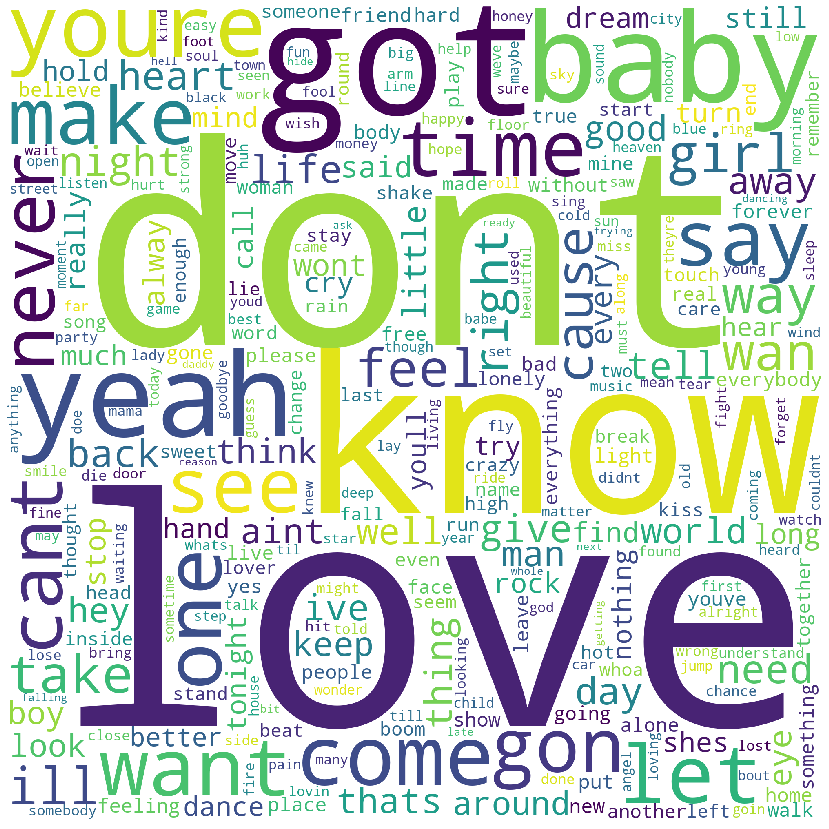

In [32]:
## Word cloud for all lyrics
text = str(lyrics_processed)
text = text.replace("'","")
wordcloud = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The word cloud for the 1950s is shown below. The word 'ditty' is an example of a popular slang term from this time.

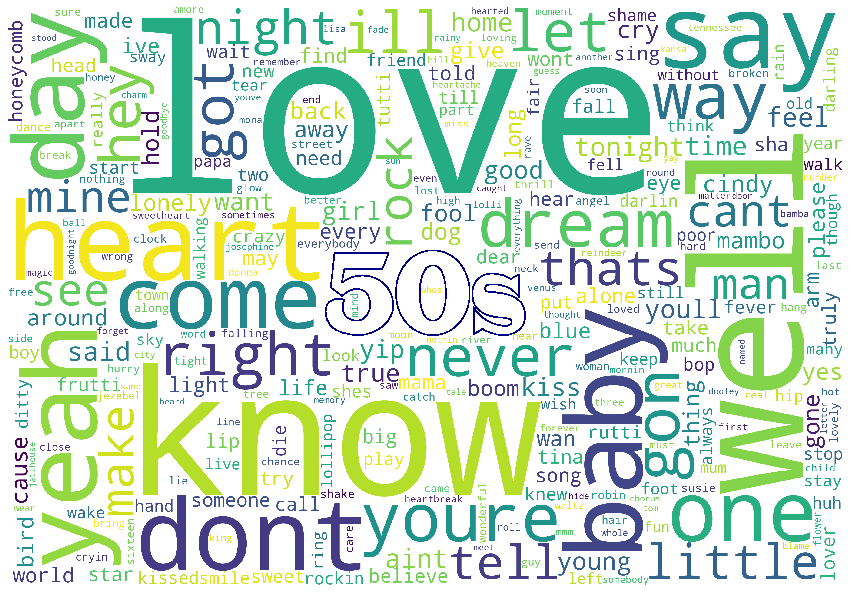

In [33]:
## Word cloud for 50s lyrics
text = str(lyrics_processed50)
text = text.replace("'","")
mask = np.array(Image.open("images/50s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

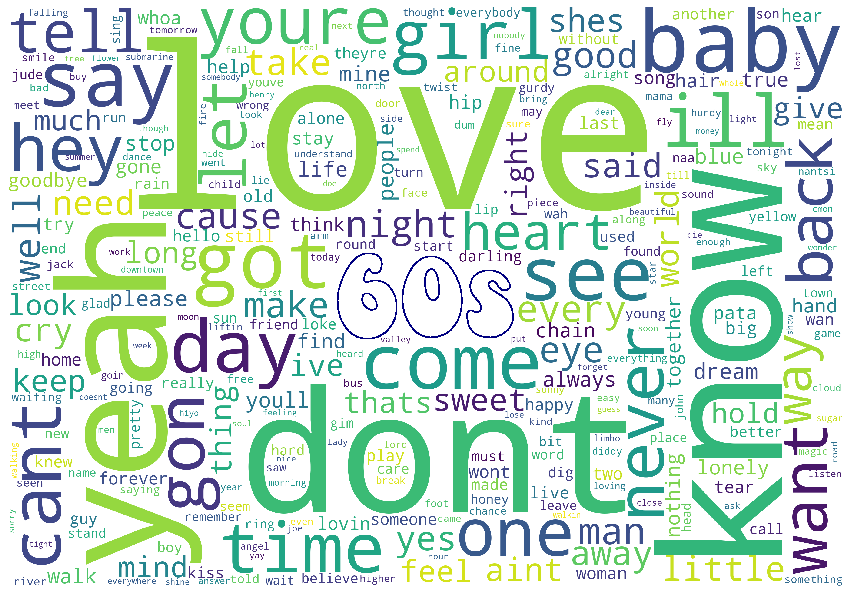

In [34]:
## Word cloud for 60s lyrics
text = str(lyrics_processed60)
text = text.replace("'","")
mask = np.array(Image.open("images/60s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

The word cloud for the 1970s is shown below. 'Boogie' is a word characterized by the rise of disco in this decade and the word 'war' can be explained by social commentary on the war in Vietnam. 

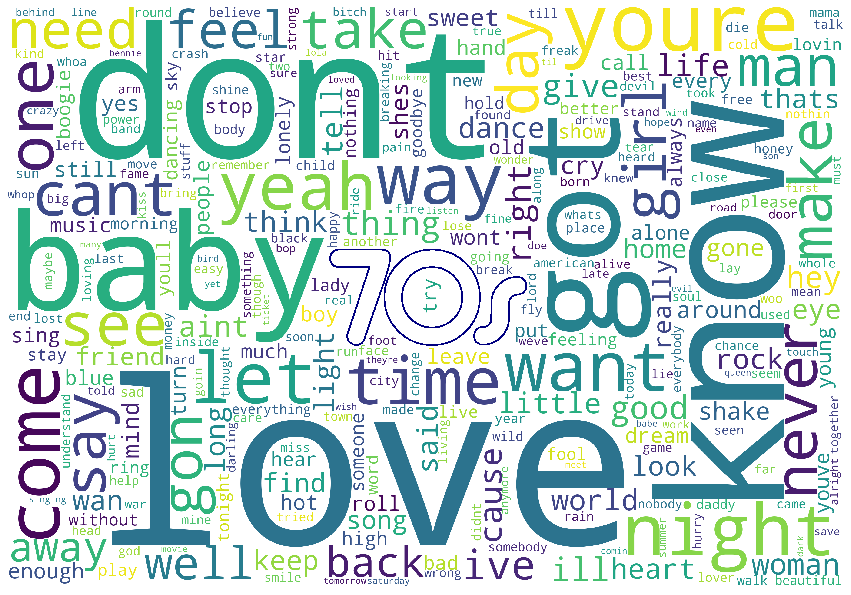

In [35]:
## Word cloud for 70s lyrics
text = str(lyrics_processed70)
text = text.replace("'","")
mask = np.array(Image.open("images/70s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

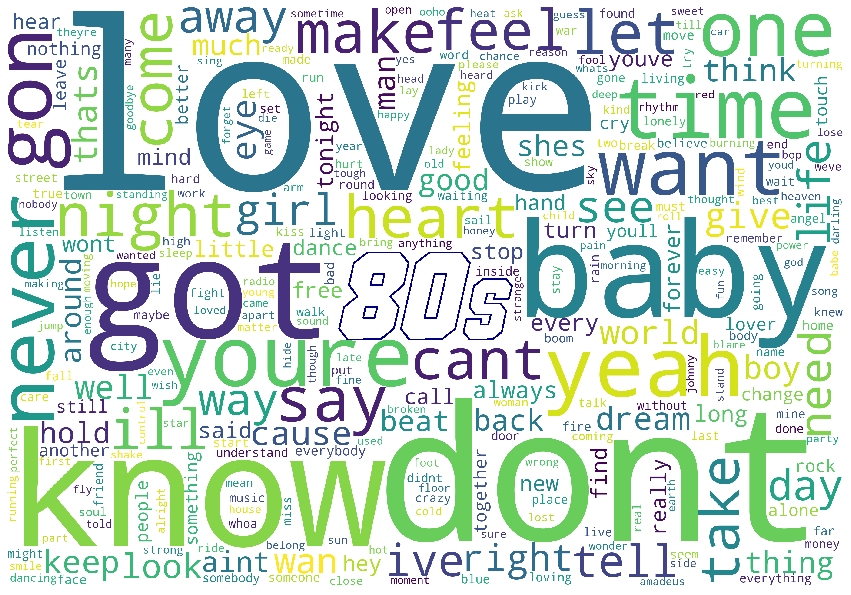

In [36]:
## Word cloud for 80s lyrics
text = str(lyrics_processed80)
text = text.replace("'","")
mask = np.array(Image.open("images/80s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

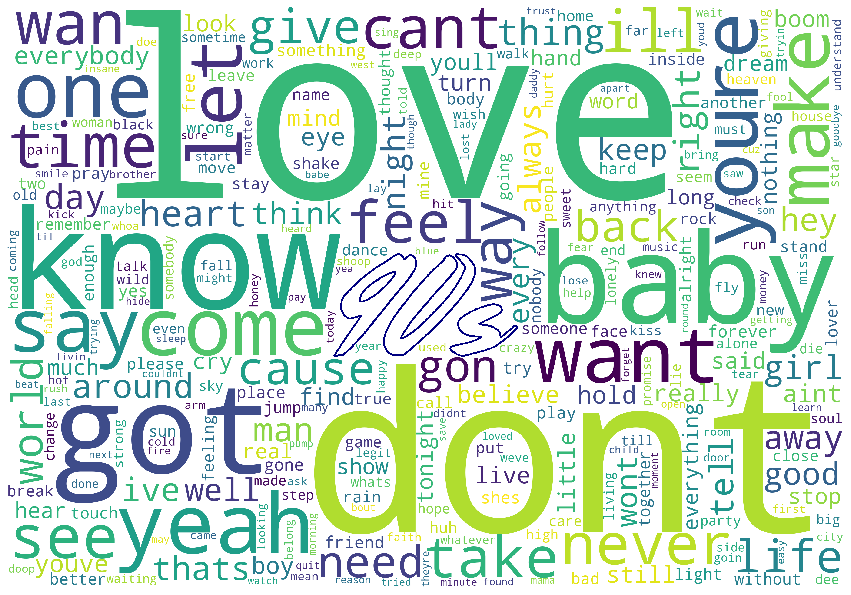

In [37]:
## Word cloud for 90s lyrics
text = str(lyrics_processed90)
text = text.replace("'","")
mask = np.array(Image.open("images/90s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

In the word cloud for the 2000s below, the word 'shawty' is an example of popular slang from this decade.

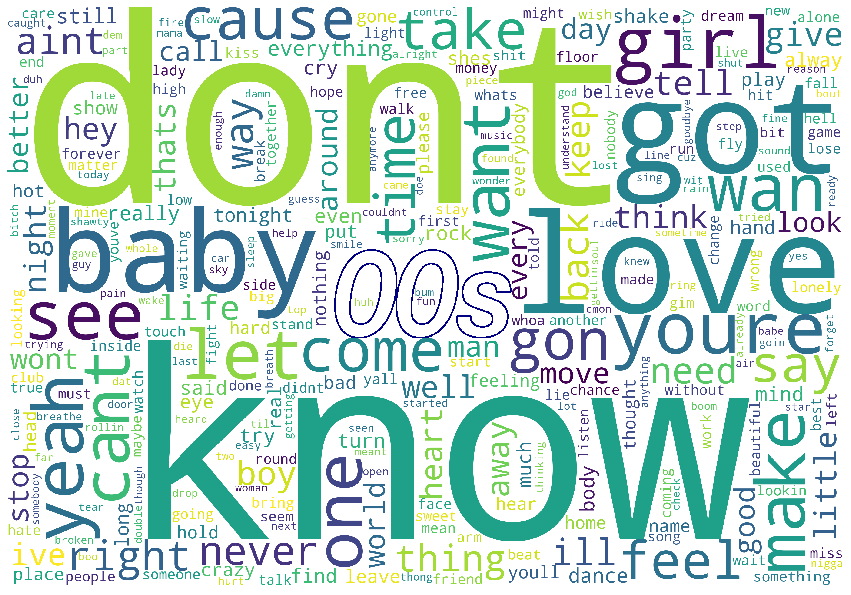

In [38]:
## Word cloud for 00s lyrics
text = str(lyrics_processed00)
text = text.replace("'","")
mask = np.array(Image.open("images/00s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

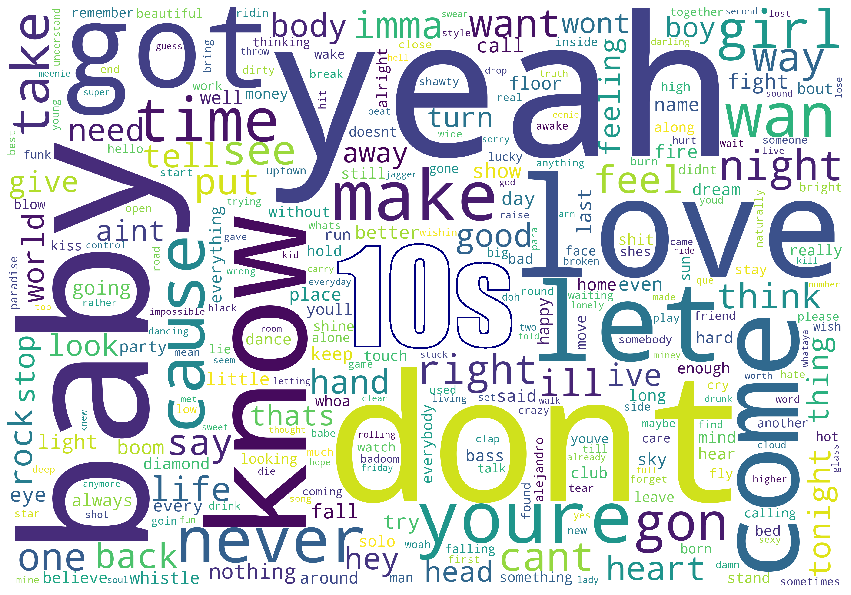

In [39]:
## Word cloud for 10s lyrics
text = str(lyrics_processed10)
text = text.replace("'","")
mask = np.array(Image.open("images/10s.png"))
wc = WordCloud(background_color="white", max_words=300, width=2000, height=2000, 
                      collocations=False, mask=mask, contour_width=12, contour_color='navy')
wc.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

### c. Descriptive statistics

#### 1. Number of words per song

In this section, we'll examine how the number of words per song has changed over time. We can split the lyrics into words and take the average of those word counts to compare them between decades.

In [40]:
## Find average number of words in a song
df['word_count'] = df['lyrics'].str.split().str.len()
avg = df['word_count'].mean()
## Find average number of words in a song for each decade
df50['word_count'] = df50['lyrics'].str.split().str.len()
avg50 = df50['word_count'].mean()
df60['word_count'] = df60['lyrics'].str.split().str.len()
avg60 = df60['word_count'].mean()
df70['word_count'] = df70['lyrics'].str.split().str.len()
avg70 = df70['word_count'].mean()
df80['word_count'] = df80['lyrics'].str.split().str.len()
avg80 = df80['word_count'].mean()
df90['word_count'] = df90['lyrics'].str.split().str.len()
avg90 = df90['word_count'].mean()
df00['word_count'] = df00['lyrics'].str.split().str.len()
avg00 = df00['word_count'].mean()
df10['word_count'] = df10['lyrics'].str.split().str.len()
avg10 = df10['word_count'].mean()

In [41]:
## View average number of words per song for each decade
averages = [avg, avg50, avg60, avg70, avg80, avg90, avg00, avg10]
df_avg = pd.DataFrame(averages, columns=['mean'])
df_avg.insert(1, "decade", ['all decades', '50s', '60s', '70s', '80s', '90s', '00s', '10s'], True)
df_avg

mean       decade
0  310.163141  all decades
1  179.072368          50s
2  202.113433          60s
3  251.885214          70s
4  284.269168          80s
5  341.792561          90s
6  409.082707          00s
7  409.176056          10s

The dataframe above and the visualization of it in the bar graph below illustrates that there is indeed a positive correlation between average words per song and decade meaning that songs are indeed becoming more verbose. This doesn't necessarily mean that songs are getting longer though, just that the songs are more densely packed with lyrical content. In fact, one of the reasons for this trend is the adoption of rap into mainstream music. Rap music entered the mainstream pop scene in the late 1970s/early 1980s and has grown in popularity since. Although, rap is fairly saturated in pop music currently, which is explained by the similar average numbers between the 2000s and 2010s. In the future, I would expect this number to remain stagnant or increase slightly if any.

In [42]:
## Average number of words per song by decade
fig = px.bar(df_avg, x='decade', y='mean')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='Avg Words Per Song by Decade')

#### 2. Song repetitiveness using Lempel-Ziv

This section will test the claim that pop songs have become more repetitive over time. To measure this we'll use an algorithm called [Lempel-Ziv complexity](https://pypi.org/project/lempel-ziv-complexity/). This compression algorithm forms the basis of many compression formats, including GIF, PNG, and ZIP. But this idea of compression can also be applied to song lyrics to illustrate repetitiveness. Data scientist Collin Morris explains why this is the case which you can read in full [here](https://pudding.cool/2017/05/song-repetition/). Essentially the idea is that the Lempel-Ziv algorithm finds repeated patterns in a string and removes them, leaving only the unique portions. Therefore, the amount of compression applied by the algorithm correlates with the repetitiveness of the song's lyrics. To see a demonstration of how this works in context see the link [here](http://colinmorris.github.io/pop-compression/ ). <br>
https://pypi.org/project/lempel-ziv-complexity/ <br>
https://pudding.cool/2017/05/song-repetition/ <br>
http://colinmorris.github.io/pop-compression/ 

In [43]:
## Compression/reduction percentage
df['compression'] = df['lyrics'].apply(lempel_ziv_complexity)
df['comp_pct'] = (1 - (df['compression'] / (df['lyrics'].str.len()))) * 100

The dataframe below shows the five most repetitive pop songs of all time according to the Lempel-Ziv algorithm. This algorithm does appear to function well since the top song in the dataframe below is Daft Punk's 'Around the World' where the words 'around the world' are repeated 120 times and are the only lyrics in the song.

In [44]:
## Most repetitive songs
df.sort_values(by='comp_pct', ascending=False).head()

artist                    name  year  \
2541   Daft Punk        Around the World  1997   
2940  Duck Sauce        Barbra Streisand  2010   
2723     Mark Oh         Tears Don't Lie  1995   
836   Paul Young  Every Time You Go Away  1985   
629   Eric Prydz              Call On Me  2004   

                                                 lyrics  word_count  \
2541  around the world around the world around the w...         426   
2940  barbra streisand ooh ooh ooh ooh ooh ooh ooh o...         243   
2723  ha ha ha haaaa ha ha ha ha haaa ha ha ha haaa ...         200   
836   hey if we cant solve any problems x81 x81 x82 ...        1042   
629   call on me call on me call on me call on me ca...         245   

      compression   comp_pct  
2541          271  88.769167  
2940          134  87.152445  
2723          124  83.106267  
836           804  81.258741  
629           181  79.776536

In [45]:
## Calculate average overall compression amount
avg = df['comp_pct'].mean()
## Calculate average compression amount by decade
df50 = df[(df.year < 1960) & (df.year > 1949)].reset_index(drop=True)
avg50 = df50['comp_pct'].mean()
df60 = df[(df.year < 1970) & (df.year > 1959)].reset_index(drop=True)
avg60 = df60['comp_pct'].mean()
df70 = df[(df.year < 1980) & (df.year > 1969)].reset_index(drop=True)
avg70 = df70['comp_pct'].mean()
df80 = df[(df.year < 1990) & (df.year > 1979)].reset_index(drop=True)
avg80 = df80['comp_pct'].mean()
df90 = df[(df.year < 2000) & (df.year > 1989)].reset_index(drop=True)
avg90 = df90['comp_pct'].mean()
df00 = df[(df.year < 2010) & (df.year > 1999)].reset_index(drop=True)
avg00 = df00['comp_pct'].mean()
df10 = df[(df.year < 2020) & (df.year > 2009)].reset_index(drop=True)
avg10 = df10['comp_pct'].mean()

In [46]:
## View average song compression percentage by decade
averages = [avg, avg50, avg60, avg70, avg80, avg90, avg00, avg10]
df_avg = pd.DataFrame(averages, columns=['compression'])
df_avg.insert(1, "decade", ['all decades', '50s', '60s', '70s', '80s', '90s', '00s', '10s'], True)
df_avg

compression       decade
0    67.376043  all decades
1    64.038291          50s
2    64.953882          60s
3    66.532541          70s
4    67.443283          80s
5    68.093003          90s
6    68.766253          00s
7    69.386326          10s

The dataframe above and the visualization of it in the bar graph below illustrates that there is indeed a positive correlation between compression amount (repetitiveness) and decade meaning that songs are indeed becoming more repetitive.

In [47]:
## Average compression percentage of song by decade
fig = px.bar(df_avg, x='decade', y='compression')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='Avg Compression Percentage by Decade')

The correlation between year and amount of compression (repetitiveness) is shown below. In fact, there is a moderate amount of positive correlation between year and compression shown by the correlation coefficient, meaning that as time goes on songs are likely to become more repetitive. So there appears to be truth to the claim that lyrics in pop music have become more repetitive. I would expect this trend to continue in the future and song lyrics will most likely continue to become more repetitive.

In [48]:
## Correlation between year and compression percentage
df_corr = df[['year', 'comp_pct']]
df_corr.corr()

year  comp_pct
year      1.000000  0.427616
comp_pct  0.427616  1.000000

## 5. Content Analytics

### a. Sentiment analysis

For this project, sentiment analysis will identify the song's lyrical tone: whether a song's lyrical content is positive or negative. Sentiments are scored on a spectrum between -1 and 1. A song that has a sentiment score of -1 will be a negative song with an angry or sadder tone. A song with a sentiment score of 1 will have a positive sentiment and a happier tone. For this sentiment analysis, we'll use a python package called vaderSentiment. Like other methods and lexicons for sentiment analysis, vaderSentiment provides polarity and subjectivity scores for the given text. However, what sets vaderSentiment apart from other methods and lexicons is its ability to process not only common dictionary words, but also slang, and acronyms. Because of this, vaderSentiment is the perfect fit for analyzing lyrical text in pop music.

In [49]:
## Calculate sentiment scores
sent = df['lyrics'].apply(analyzer.polarity_scores)
sent_df = pd.DataFrame(sent.tolist())
df = pd.concat([df, sent_df], axis=1)
df = df[['artist', 'name', 'year', 'lyrics', 'compound']]
df.head()

artist                               name  year  \
0      Bryan Adams  (Everything I Do) I Do it For You  1991   
1  Whitney Houston             I Will Always Love You  1992   
2      Bill Haley               Rock Around the Clock  1955   
3      Celine Dion                My Heart Will Go On  1998   
4      The Beatles                           Hey Jude  1968   

                                              lyrics  compound  
0  look into my eyes - you will see what you mean...    0.9286  
1  if i should stay i would only be in your way s...    0.9990  
2  one two three oclock four oclock rock five six...    0.9260  
3  every night in my dreams i see you i feel you ...    0.9788  
4  hey jude dont make it bad take a sad song and ...    0.9979

Here are the ten songs with the most positive lyrics in the dataset.

In [50]:
## Songs with the most positive lyrics
df.sort_values(by='compound', ascending=False).head(10)

artist                                name  year  \
1569        Jody Watley              Looking For a New Love  1987   
1191          Lady GaGa                            Lovegame  2009   
2864         Pappa Bear                             Cherish  1998   
2467  Justin Timberlake                             Mirrors  2013   
3062            Pebbles              Giving You the Benefit  1990   
3050            East 17                       House of Love  1992   
1517        Spice Girls                                Mama  1997   
1691          MC Hammer                                Pray  1990   
1526            Fat Joe                         What's Luv?  2002   
2499              Sting  If You Love Somebody Set Them Free  1985   

                                                 lyrics  compound  
1569  hasta la vista baby you gave me love you did m...    0.9999  
1191  lets have some fun this beat is sick i wanna t...    0.9999  
2864  featuring van der toorn cherish the love we ha...    0.9999  
2467  arent you something to admire cause your shine...    0.9999  
3062  g-g-giving you giving you. g-g-giving you givi...    0.9999  
3050  everybody everybody in the house of love every...    0.9999  
1517  she used to be my only enemy and never let to ...    0.9999  
1691  thats word we pray pray pray we got to pray ju...    0.9999  
1526  put the fuckin mic on. mic is on joe crack the...    0.9998  
2499  free free set them free oh whoa free free set ...    0.9998

These are the ten songs with the most negative lyrics in the dataset.

In [51]:
## Songs with the most negative lyrics
df.sort_values(by='compound').head(10)

artist                       name  year  \
1775         Culture Club               The War Song  1984   
2860          Suzi Quatro  If You Can't Give Me Love  1978   
2206           Elton John          The Bitch is Back  1974   
1179  The Black Eyed Peas                  Don't Lie  2005   
583       Michael Jackson                        Bad  1987   
1694          Suzi Quatro                   48 Crash  1973   
1544          Limp Bizkit         Take a Look Around  2000   
946     Justin Timberlake             Cry Me a River  2003   
2583              P Diddy      Been Around the World  1997   
1834        Janet Jackson                      Nasty  1986   

                                                 lyrics  compound  
1775  war war is stupid and people are stupid and lo...   -0.9999  
2860  well ive seen you before on that discotheque f...   -0.9998  
2206  i was justified when i was five raising cain i...   -0.9997  
1179  yeah uh huh la da da da da da sorry sorry sorr...   -0.9996  
583   your butt is mine gonna tell you right just sh...   -0.9996  
1694  well you got the hands of a man and the face o...   -0.9996  
1544  all the tension in the world today all the lit...   -0.9996  
946   you were my sun you were my earth but you didn...   -0.9996  
2583  intro mase yo yo this mase youknowhatimsayin y...   -0.9995  
1834  gimme a beat sittin in the movie show thinkin ...   -0.9995

Now we can use these sentiment scores and find the averages by decade to see how the sentiment of songs have changed over time.

In [52]:
## Calculate average overall sentiment
avg = df['compound'].mean()
## Calculate average sentiment score by decade
df50 = df[(df.year < 1960) & (df.year > 1949)].reset_index(drop=True)
avg50 = df50['compound'].mean()
df60 = df[(df.year < 1970) & (df.year > 1959)].reset_index(drop=True)
avg60 = df60['compound'].mean()
df70 = df[(df.year < 1980) & (df.year > 1969)].reset_index(drop=True)
avg70 = df70['compound'].mean()
df80 = df[(df.year < 1990) & (df.year > 1979)].reset_index(drop=True)
avg80 = df80['compound'].mean()
df90 = df[(df.year < 2000) & (df.year > 1989)].reset_index(drop=True)
avg90 = df90['compound'].mean()
df00 = df[(df.year < 2010) & (df.year > 1999)].reset_index(drop=True)
avg00 = df00['compound'].mean()
df10 = df[(df.year < 2020) & (df.year > 2009)].reset_index(drop=True)
avg10 = df10['compound'].mean()

In [53]:
## View songs average sentiment score by decade
averages = [avg, avg50, avg60, avg70, avg80, avg90, avg00, avg10]
df_avg = pd.DataFrame(averages, columns=['score'])
df_avg.insert(1, "decade", ['all decades', '50s', '60s', '70s', '80s', '90s', '00s', '10s'], True)
df_avg

score       decade
0  0.432122  all decades
1  0.653475          50s
2  0.447602          60s
3  0.442676          70s
4  0.424814          80s
5  0.435674          90s
6  0.357073          00s
7  0.485987          10s

The dataframe above and the visualization of it in the bar graph below illustrates that there is really not much correlation between sentiment scores and decade. There are interesting aspects to point out though, like how songs in the 1950s were quite a bit more positive than other decades. Similarly, songs in the 2000s were a bit more negative than in other decades. While there isn't really a trend to find with sentiment scores, the one takeaway from this information is that pop music is generally positive. Therefore, I would expect most pop songs to chart in the future to have a higher positive sentiment score.

In [54]:
## Average sentiment score of song by decade
fig = px.bar(df_avg, x='decade', y='score')
fig.update_traces(marker_color='blue', marker_line_color='blue', opacity=0.6)
fig.update_layout(title_text='Avg Sentiment Score by Decade')

### b. Text classification

Using text classification we'll train a model to learn and determine whether a song fits into a particular category or not. The goal is for the algorithm to classify each song as accurately as possible. In this particular case, we'll divide songs into two time periods, before 1985 and after 1985. Because the algorithm needs labeled data to train itself, a 1 will denote that a song was made before 1985 and a 0 means that the song was made after. Once the model is trained, we'll apply it using unlabeled songs.

In [55]:
## Create before and after 1985 dummy variables
df['before_1985'] = (df.year < 1986) & (df.year > 1949)
df["before_1985"] = df["before_1985"].astype(int)
df['before_1985'].value_counts()

0    1778
1    1342
Name: before_1985, dtype: int64

In [56]:
## Vectorization
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(df['lyrics'])
print(tfidf.shape)

(3120, 18748)


In [57]:
## Document term matrix to array
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lyrics']).toarray()

In order to prevent overfitting, we'll use split validation. In other words, we'll separate the data into a train/test split. The training set will be used to train the algorithm, and the testing set will test the accuracy of the model.

In [58]:
## Define train/test groups through split validation
x_train, x_test, y_train, y_test = train_test_split(df['lyrics'], df['before_1985'], test_size=0.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(2184, 2184, 936, 936)

In [59]:
## Transform training data using tfidf_vectorizer
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

For this project, we'll use Pipeline to build our classification model. The benefit of using Pipeline is that it streamlines the model building process while also building several models based on several parameters to select the most accurate model.

In [60]:
## Build model
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')),
                        ('clf', MultinomialNB())])
## Set parameters
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__min_df': [1, 2, 5],
              'tfidf__max_df': [0.9, 0.8, 0.7],
              'clf__alpha': (0.01, 0.001, 1),}
## Build models based on parameters
gs_clf = GridSearchCV(nb_pipeline, parameters, cv=3);
gs_clf.fit(x_train, y_train);

In this case, the most accurate model that Pipeline could build is around 69% accurate.

In [61]:
## Show best accuracy score
gs_clf.best_score_

0.6868131868131868

In [62]:
## Show parameters for best score
for param_name in sorted(parameters.keys()):
    print(("%s: %r" % (param_name, gs_clf.best_params_[param_name])))

clf__alpha: 0.01
tfidf__max_df: 0.9
tfidf__min_df: 2
tfidf__ngram_range: (1, 1)


In [63]:
## Build model based on best score parameters
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=2, 
                                                  ngram_range=(1,1), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)

In [64]:
## Model accuracy
print('Overall accuracy:', metrics.accuracy_score(y_test, predicted))
print('-----------------------------------------------------------')
print('Classification report:')
print(metrics.classification_report(y_test, predicted))

Overall accuracy: 0.6891025641025641
-----------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       535
           1       0.72      0.45      0.56       401

    accuracy                           0.69       936
   macro avg       0.70      0.66      0.66       936
weighted avg       0.70      0.69      0.67       936



Displayed below is the confusion matrix for the Pipeline classification model. A confusion matrix is a visualization of the accuracy of a classification model. The goal of a confusion matrix is to maximize the true rates, the numbers diagonal from top left to bottom right. Naturally, when maximizing the true rates we'll want to minimize the rest which are called false rates.

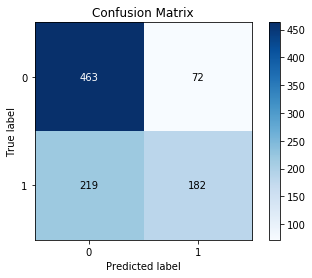

In [65]:
## Confusion matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

In [66]:
## Open unlabeled text
with open("data/unlabeled.txt", "r") as file:
    unlabeled = eval(file.readline())

Now we can use this classification model to test unlabeled data. I've gather lyrics from ten songs that were not able to be collected through scraping. These tens songs are:

* Chubby Checker - Let's Twist Again - 1961
* The Righteous Brothers - Unchained Melody - 1965
* Archies - Sugar Sugar - 1969
* Simon & Garfunkel	- Bridge Over Troubled Water -  1970
* Eagles - Hotel California - 1977
* Hanson - Mmmbop - 1997
* Lou Bega - Mambo No 5 - 1999
* TLC - No Scrubs - 1999
* Timbaland	- Apologize - 2007
* Kesha	- Tik Toc - 2010 

With the unlabeled data, the text classification model correctly classified 7 out of the 10 songs for an accuracy score of 70%, very similar to the overall model accuracy. While this accuracy score isn't incredibly high, it's still quite a bit more accurate than just a flip of a coin.

In [67]:
## Test unlabeled data
predicted = nb_pipeline.predict(unlabeled)
for doc, category in zip(unlabeled, predicted):
    print(('%r => %s' % (doc[0:100], category)))

"Come on everybody, clap your hands Are you lookin' good? I'm gonna sing my song It won't take long W" => 0
"Oh, my love, my darling I've hungered for your touch A long, lonely time Time goes by so slowly And " => 1
'Sugar, ah honey honey You are my candy girl And you got me wanting you Honey, ah sugar sugar You are' => 1
"When you're weary, feeling small When tears are in your eyes, I will dry them all, all I'm on your s" => 1
'On a dark desert highway Cool wind in my hair Warm smell of colitas Rising up through the air Up ahe' => 0
'Oh Oh oh oh Oh oh oh oh Yeah You have so many relationships in this life Only one or two will last Y' => 1
'Ladies and gentlemen, this is Mambo Number Five One, two, three, four, five Everybody in the car, so' => 0
"A scrub is a guy that think he's fine and is Also known as a buster (buster, buster) Always talkin' " => 0
"I'm holding on your rope Got me ten feet off the ground And I'm hearing what you say But I just can'" => 0
"Wake up in the mornin' feel

### c. Topic modeling

Topic modeling is similar to text classification, however, the main difference between the two is that topic modeling is unsupervised machine learning while text classification is supervised meaning that topic modeling does not need labeled data. One popular algorithm for topic modeling is called latent dirichlet allocation (LDA). The goal of LDA is to find topics from texts that may be hidden or unobserved and cluster them together. For this project, we'll attempt to see what topics are prevalent in popular music song lyrics.

In [68]:
## Define topic model documents processing function
def topic_processing(x):
    ## Remove useless numbers and alphanumerical words
    documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in x]
    ## Tokenize
    texts = [[word for word in text.lower().split() ] for text in documents]
    ## Stemming words
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
    ## Remove stop words 
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]
    ## Remove short words
    texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]
    ## List of extra stopwords
    extra_stopwords = ['ooh', 'oooh', 'got', 'get', 'make', 'aint', 'youre', 'ill', 'yeah', 
                       'hey', 'let', 'whoa', 'come', 'well', 'thats', 'could', 'ive', 'would'
                      'doo', 'huh', 'whats', 'gonna', 'wanna', 'want', 'cause']
    ## Remove extra stopwords
    texts = [[word for word in text if word not in extra_stopwords] for text in texts]
    return texts

In [69]:
## Process text into documents
## Dataframe to list
data = df['lyrics'].tolist()
## Call topic processing function
texts = topic_processing(data)

In [70]:
## Create a dictionary representation of the documents
dictionary = Dictionary(texts)
## Remove rare and common tokens
dictionary.filter_extremes(no_below=2, no_above=0.4)
## Convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 7515
Number of documents: 3120


Before building the model we'll need to determine how many topics are present in the data by finding the optimal k-value. According to the graph below, the optimal k-value is 2, signaling that there isn't a great deal of diversity in topics.

-1.4768478911203031
-1.667242756471828
-2.0514269336138478
-1.5759467007093488


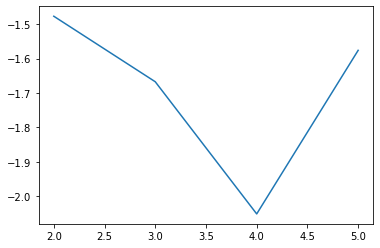

In [71]:
## Find optimal k-value
np.random.seed(1)
k_range = range(2,6)
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    cm = CoherenceModel(model=LdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    print((cm.get_coherence()))
    scores.append(cm.get_coherence())    
plt.figure()
plt.plot(k_range, scores)

In [72]:
## Build model based on optimal k-value
np.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, passes=50)

In [73]:
## Print top 15 words for each topic
for i in range(0,2):
    topics = model.show_topic(i, 15)
    print(', '.join([str(word[0]) for word in topics]))

baby, never, cant, one, see, say, feel, way, heart, life, take, away, need, give, day
girl, baby, boy, man, dance, rock, right, back, night, everybody, body, one, take, see, shake


The document-topic distribution is the combination of topics within a document or set of texts. Most documents will have more than one topic associated with it and will have probability information for association with a topic. Here we are determining the highest topic probability for each document to assign the document a topic.

In [74]:
## Save document-topic distribution 
lda_corpus = model[corpus]
results = []
for i in lda_corpus:
    results.append(i)
## Top topics
topic = [max(collection, key=lambda x: x[1])[0] for collection in results]
## Merge majority topic information with the original texts
topic = pd.DataFrame(topic, columns=['topic'])
dfdata = pd.DataFrame(data, columns=['documents'])
summary = dfdata.join(topic)
summary.head()

documents  topic
0  look into my eyes - you will see what you mean...      0
1  if i should stay i would only be in your way s...      0
2  one two three oclock four oclock rock five six...      1
3  every night in my dreams i see you i feel you ...      0
4  hey jude dont make it bad take a sad song and ...      0

The topic distribution below shows that most topics belong to the topic with the index 0.

In [75]:
## Topic distribution
summary['topic'].value_counts().head()

0    2309
1     811
Name: topic, dtype: int64

Now we can visualize the topic model to find out more information about each topic. 
* Topic 1 (index 0) in the visual below seems to reflect the 'love song' phenomenon referenced earlier in the project. Words like 'baby,' 'heart,' and 'cry' are reflective of this topic. 
* Topic 2 (index 1) seems to be more about dancing, partying, and enjoying the music itself. Words like 'dance,' 'rock,' 'shake,' and 'music' point to this.

In [76]:
## Visualize topics
pyLDAvis.enable_notebook()
LDA = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(LDA, 'lda.html')
display(IFrame('lda.html', '100%', '875px'))

The topics were identified based on the highest probability for each document. But we could also take into account the probabilities to figure out which topic is most prevalent based on document-topic distribution. The result is fairly similar to the topic distribution, the vast majority of songs are topic 1 (index 0).

In [77]:
## Document topic distribution to dataframe
def listify(l):
    res = []
    for j in l:
        d = dict([(i, 0) for i in range(2)])
        d.update(j) 
        res.append(list(d.values()))
    return res
z = listify(results)
dtd = pd.DataFrame(z)

In [78]:
## Most prevalent topic based on document-topic distribution
dtd.sum(axis=0).sort_values(ascending=False) / len(dtd)

0    0.714571
1    0.283629
dtype: float64

Now we can use the same unlabeled songs we used previously to apply to the topic model.

In [79]:
## Open unlabeled documents
with open("data/unlabeled.txt", "r") as file:
    unlabeled = eval(file.readline())
## Call topic processing function
unlabeled = topic_processing(unlabeled)

In [80]:
## Predict topics
for i in unlabeled:
    bow = model.id2word.doc2bow(i)
    doc_topics, word_topics, phi_values = model.get_document_topics(
        bow, per_word_topics=True)
    print(doc_topics)

[(0, 0.29394025), (1, 0.7060598)]
[(0, 0.9662352), (1, 0.033764776)]
[(0, 0.3710072), (1, 0.6289928)]
[(0, 0.98772436), (1, 0.012275645)]
[(0, 0.6320023), (1, 0.3679977)]
[(0, 0.5538899), (1, 0.4461101)]
[(0, 0.19079418), (1, 0.80920583)]
[(0, 0.2756503), (1, 0.72434974)]
[(0, 0.9792756), (1, 0.020724393)]
[(0, 0.14396344), (1, 0.85603654)]


The unlabeled songs are predicted to represent the following topics:
* Chubby Checker - Let's Twist Again  &nbsp;&nbsp; ==>  &nbsp;&nbsp; predicted as topic 2 (dance/party song)
* The Righteous Brothers - Unchained Melody &nbsp;&nbsp;  ==> &nbsp;&nbsp;  predicted as topic 1 (love song)
* Archies - Sugar Sugar  &nbsp;&nbsp; ==>  &nbsp;&nbsp; predicted as topic 2 (dance/party song)
* Simon & Garfunkel - Bridge Over Troubled Water  &nbsp;&nbsp; ==>  &nbsp;&nbsp; predicted as topic 1 (love song)
* Eagles - Hotel California &nbsp;&nbsp;  ==> &nbsp;&nbsp;  predicted as topic 1 (love song)
* Hanson - Mmmbop  &nbsp;&nbsp; ==> &nbsp;&nbsp; predicted as topic 1 (love song)
* Lou Bega - Mambo No 5  &nbsp;&nbsp;  ==>  &nbsp;&nbsp;  predicted as topic 2 (dance/party song)
* TLC - No Scrubs  &nbsp;&nbsp;  ==> &nbsp;&nbsp;  predicted as topic 2 (dance/party song)
* Timbaland	- Apologize &nbsp;&nbsp;   ==>  &nbsp;&nbsp;  predicted as topic 1 (love song)
* Kesha	- Tik Toc   &nbsp;&nbsp;  ==>  &nbsp;&nbsp;   Predicted as topic 2 (dance/party song)

## 6. Network Analytics

Network analytics can visualize and reveal relationships between certain groups. For this project, we'll use the artists in the top 5000 songs dataset to visualize and reveal relationships. The goal is to create relationships between artists who released music in the same decade. The output will then show artists who have had both success and longevity in their careers.

In [81]:
## Load original scraped dataframe
df = pd.read_csv('data/scraped_lyrics.csv')
df = df[['artist', 'year']]
df.head()

artist  year
0      Bryan Adams  1991
1  Whitney Houston  1992
2      Bill Haley   1955
3      Celine Dion  1998
4      The Beatles  1968

In [82]:
## Categorize by decade
df['year'] = df['year'].astype(str)
df['year'] = df['year'].str[2:3]
len(df)

4645

In [83]:
## Drop duplicates and check number of rows
df = df.drop_duplicates()
len(df)

2441

In [84]:
## Convert to lists
list5 = df[(df['year'] == '5')]
list5 = list5['artist'].to_list()
list6 = df[(df['year'] == '6')]
list6 = list6['artist'].to_list()
list7 = df[(df['year'] == '7')]
list7 = list7['artist'].to_list()
list8 = df[(df['year'] == '8')]
list8 = list8['artist'].to_list()
list9 = df[(df['year'] == '9')]
list9 = list9['artist'].to_list()
list0 = df[(df['year'] == '0')]
list0 = list0['artist'].to_list()
list1 = df[(df['year'] == '1')]
list1 = list1['artist'].to_list()

In [85]:
## Prepare for combination
comb50 = []
for i in list5:
    a = list5
    comb50.append(a)
comb50 = comb50[:1]
comb60 = []
for i in list6:
    a = list6
    comb60.append(a)
comb60 = comb60[:1]
comb70 = []
for i in list7:
    a = list7
    comb70.append(a)
comb70 = comb70[:1]
comb80 = []
for i in list8:
    a = list8
    comb80.append(a)
comb80 = comb80[:1]
comb90 = []
for i in list9:
    a = list9
    comb90.append(a)
comb90 = comb90[:1]
comb00 = []
for i in list0:
    a = list0
    comb00.append(a)
comb00 = comb00[:1]
comb10 = []
for i in list1:
    a = list1
    comb10.append(a)
comb10 = comb10[:1]

In [86]:
## Build relationships
network50 = [x for i in comb50 for x in combinations(i, 2)]
network60 = [x for i in comb60 for x in combinations(i, 2)]
network70 = [x for i in comb70 for x in combinations(i, 2)]
network80 = [x for i in comb80 for x in combinations(i, 2)]
network90 = [x for i in comb90 for x in combinations(i, 2)]
network00 = [x for i in comb00 for x in combinations(i, 2)]
network10 = [x for i in comb10 for x in combinations(i, 2)]
network = network50 + network60 + network70 + network80 + network90 + network00 + network10
len(network)

483029

In [87]:
## Relationship network to dataframe
network_df = pd.DataFrame(network)
network_df.head()

0                  1
0  Bill Haley         Bobby Darin
1  Bill Haley       Elvis Presley
2  Bill Haley       Nat King Cole
3  Bill Haley           Doris Day
4  Bill Haley   The Kingston Trio

Below is the final network visual created in Gephi. Artists with larger names have a higher network degree centrality, in other words, the number of links the artist has with other links. Artists with larger names in the graph are the artists who have had both success and longevity throughout their careers, meaning that they have had popular songs in multiple decades.

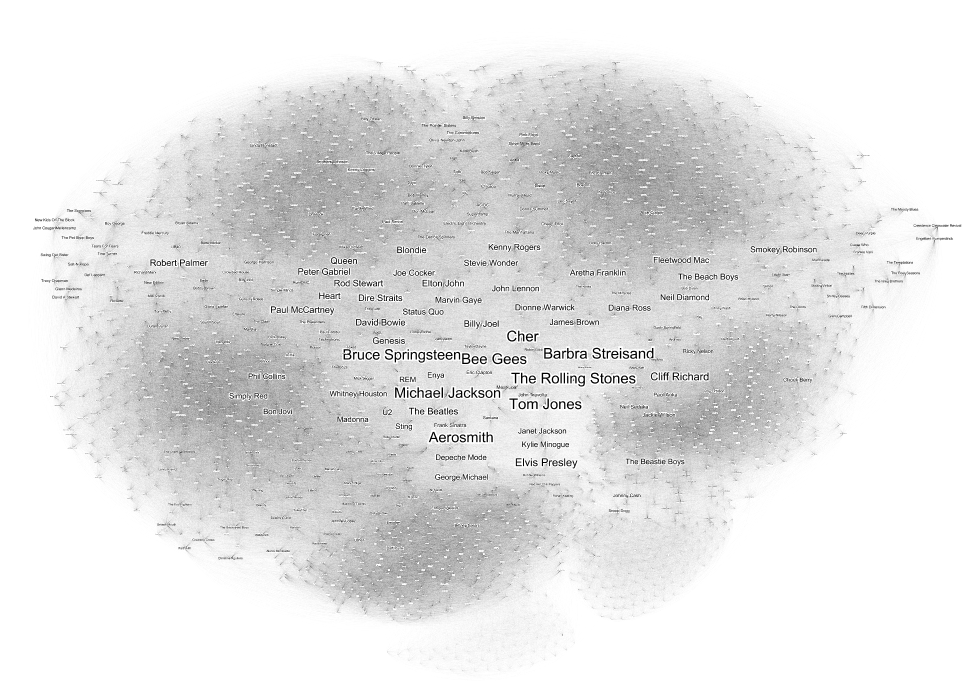

In [88]:
## Embed Gephi network visual
from IPython.display import Image
Image("images/network.png")

The network below shows clusters within the larger network. The clusters visualize the different periods that artists were active and successful in. While there are seven overall decades in the dataset, it's fairly rare for artists to be a one-hit-wonder and only release music in one decade, especially considering only artists who have a song in the top 5000 songs of all time are in this network. Therefore, the clusters are melded into rough time periods with decades in mind but not necessarily reflective of decades since there are only five total clusters.
* Pink 
    * "Oldies" (mostly 50-60s)
    * Chuck Berry, Frank Sinatra, Marvin Gaye, Johnny Cash
* Purple 
    * "Disco" (mostly 70s)
    * The Rolling Stones, Barbara Streisand, Elton John, The Beatles
* Red 
    * "Radio Star" (mostly 80s)
    * Michael Jackson, Queen, David Bowie, Paul McCartney
* Green 
    * "Grunge" (mostly 90s)
    * Whitney Houston, Nirvana, George Michael, Janet Jackson
* Blue 
    * "Y2K" (mostly 00s-10s)
    * Madonna, U2, Aerosmith, Bruce Springsteen

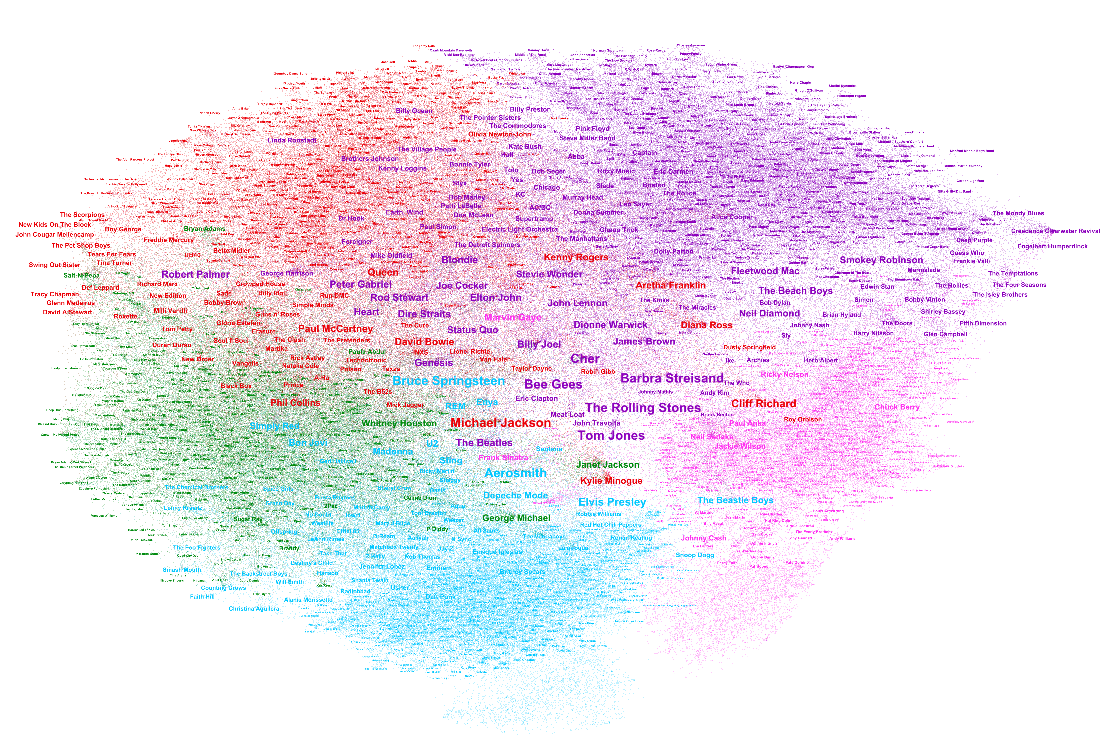

In [89]:
## Embed Gephi clustered network visual
Image("images/network_clusters.png")

The top 20 artists with the highest degree centrality are shown in the dataframe below. Barbra Streisand has the highest degree of all artists in the dataset. This makes sense intuitively since Streisand has 36 total albums to date, spanning from the early 1960s to the late 2010s.

In [90]:
## Load data from Gephi to show degree
df = pd.read_csv('data/degree.csv')
df = df[['Label', 'Degree']]
df.sort_values(by='Degree', ascending=False).head(20).reset_index(drop=True)

Label  Degree
0     Barbra Streisand    1458
1   The Rolling Stones    1456
2                 Cher    1456
3             Bee Gees    1456
4            Tom Jones    1453
5      Michael Jackson    1441
6    Bruce Springsteen    1439
7            Aerosmith    1439
8        Elvis Presley    1265
9        Cliff Richard    1260
10         The Beatles    1174
11               Queen    1158
12          Elton John    1158
13      Paul McCartney    1158
14         David Bowie    1158
15       Robert Palmer    1156
16             Blondie    1156
17               Heart    1156
18         Rod Stewart    1156
19       Peter Gabriel    1156

## 7. Storytelling and Conclusion

### a. Key takeaways

This project examined and analyzed how lyrical content in popular music has evolved and changed over time using text analytics methods word frequency, word cloud, descriptive statistics, sentiment analysis, text classification, topic modeling, and network analytics. Here are the conclusions we've reached in this analysis with some prediction for the future:
* **'Love songs' are declining in popularity and will likely continue this trend in the future**
    * Word frequency showed that the word 'love' started as the most frequent word in songs in the 1950s and steadily declined to fifth most popular in the 1910s. It's possible that 'love songs' are seen as too cliche and seen as a thing of the past or they've become less superficial or overstated as in past generations. It is likely, given the analysis that this trend will continue in the future.
* **Songs grew more verbose over time but this will likely become stagnant**
    * The descriptive statistics section showed a positive correlation between average words per song and decade meaning that songs are indeed becoming more text heavy. This doesn't necessarily mean that songs are getting longer though, just that the songs are more densely packed with lyrical content. Rap music's adoption into pop music is likely the reason for this, although, rap is fairly saturated in pop music currently so it likely won't increase much more.
* **Song lyrics are becoming more repetitive**
    * Using the Lempel-Ziv algorithm we illustrated that there is indeed a positive correlation between compression amount (repetitiveness) and decade meaning that songs are indeed becoming more repetitive. In fact, there is a moderate amount of positive correlation between year and compression shown by the correlation coefficient, meaning that as time goes on songs are likely to become more repetitive.
* **Pop music lyrics are more positive than negative**
    * While the sentiment analysis section didn't reveal any trends in sentiment throughout the decades, the analysis did prove that pop music lyrics are more positive, and this phenomenon is likely to continue.
* **Pop music is fairly limited in topics**
    * In the topic modeling section, the optimal k-value was 2 meaning that there wasn't a great deal of diversity in topics. The two topics involved 'love songs' and songs about dancing, partying, and enjoying the music itself.
* **Top charting artists with both success and longevity can be visualized with network analytics**
    * Artists with higher degree centrality, those with the highest number of links with other artists, are the artists who have had both success and longevity throughout their career, meaning that they have had popular songs in multiple decades. Barbra Streisand, The Rolling Stones, and Cher are among the artists with the highest degree centrality.
* **Non-decade specific clusters can be shown with network analytics**
    * The clusters visualize the different time periods that artists were active and successful in.

### b. Implications

**Sociological context** 
* As stated before music serves not only as an art form and means of personal expression but also as cultural expression and the most popular songs of a given time period are representative of that period. This project can be used to draw conclusions to both help describe pop culture from history as well as predict cultural trends in the future.

**Business context**
* As mentioned before, the music industry is currently a multi-billion dollar a year industry with pop music at the forefront of that revenue. This project and its analysis can help producers and marketers of pop music discover trends of the past and future to position their clients for success in the music industry.

**Technological implications**
* The main technological implication of this dataset is the limited sample size. On one hand, it would improve the analysis if additional songs were used, but on the other hand, if too many songs are used per decade or year then the term 'popular' in pop music comes into question.